<a href="https://colab.research.google.com/github/AgusCarchano/Mentorias-grupo1/blob/editado/Practico_01_Analisis_y_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Opción para ver todas las columnas del dataset en el notebook
pd.set_option('display.max_columns', 50)

# Práctico 01: Análisis y Visualización

## Descripción del dataset
El dataset se basa en una campaña de marketing de un banco de Portugal. Consiste en llamadas telefónicas a clientes para que adquieran un depósito de plazo fijo.
El objetivo consiste en predecir si el cliente va a adquirir el producto o no (clasificación binaria). Este es un problema muy interesante ya que la mayoría de las empresas hacen campañas de marketing directo y necesitan saber cuáles son los clientes más propensos a adquirir los productos que ofrece.


Si querés inspeccionar el conjunto de datos, lo encontrarás en el repositorio UCI:
 https://archive.ics.uci.edu/ml/datasets/Bank+Marketing  
 
Utilizaremos el archivo más completo: bank-additional-full.csv, consiste en alrededor de 40.000 llamadas realizadas a clientes del banco (algunas llamadas son hacia el mismo cliente pero en otro momento).


## Objetivo del práctico

### Conocer los datos en forma global
- Cantidad de registros
- Cantidad de variables
- Variables dependientes e independientes
- Distribuciones en general
- Entendimiento de cada variable  

Es recomendable elaborar un diccionario de datos con el significado de cada variable

### Dar respuesta a hipótesis - Encontrar "insights"

Además de conocer los datos en forma global y hacer un análisis descriptivo, es necesario responder preguntas sobre hipótesis que pueden surgir.  
Por ejemplo:  
- ¿Es la edad un factor significativo?
- ¿Influye el nivel de educación?
- ¿Qué insights podemos encontrar en los datos?  


### Presentación

Al final del práctico, es necesario hacer 3 o 4 slides que irán incluidos en la presentación final.  
Los slides deberán contener los principales insights encontrados.

### Librerías recomendadas para visualización

Se recomiendan las siguientes librerías para visualización:  
- Seaborn: permite hacer gráficos estáticos, su fuerte son los gráficos estadísticos (dispersión, boxplot, etc).
- Plotly: permite hacer gráficos dinámicos (es posible hacer zoom, etc). Es bastante fácil de usar y muy buena para hacer gráficos finales para una presentación. Es un poco complicada la instalación.

## Práctico 01: Análisis y Visualización - Resolución

### Leer el dataset

In [21]:
# Leemos el dataset con la función de pandas "read_csv"
url = "https://raw.githubusercontent.com/AgusCarchano/Mentorias-grupo1/editado/data/bank-additional-full.csv"
df = pd.read_csv(url, sep=";")

In [22]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
# Descripción de las variables numéricas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
# Ejemplo de distribución de educación
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

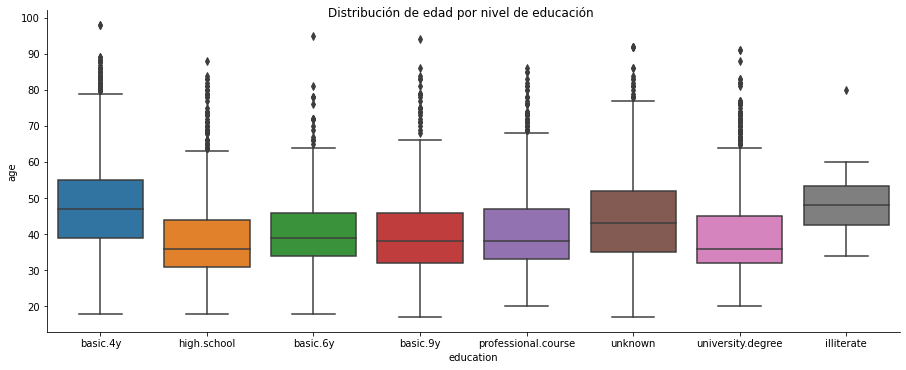

In [14]:
# Ejemplo de gráfico que permite analizar la distribución de la edad con respeto al nivel de educación
ax = sns.catplot(x="education", y="age", kind="box", data=df, height=5, aspect=2.5)
ax.fig.suptitle('Distribución de edad por nivel de educación');

In [23]:
df2 = df

nuevos = {
    'basic.4y': 'Basica',
    'basic.6y': 'Basica',
    'basic.9y': 'Basica',
    'high.school': 'Secundaria',
    'university.degree': 'Universitaria',
    'professional.course': 'Profesional',
    'unknown': 'Desconocido',
    'illiterate': 'Sin educacion'
}




df2["education"] = df2["education"].replace(nuevos)

df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basica,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,Secundaria,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,Secundaria,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basica,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,Secundaria,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,Profesional,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,Profesional,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,Universitaria,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,Profesional,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


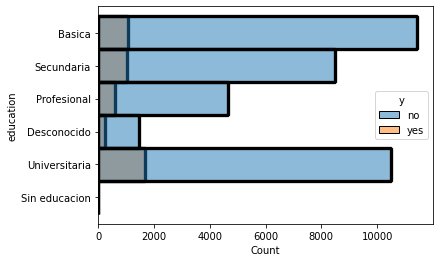

In [28]:
sns.histplot(df2,
                 y=df2["education"],
                 hue= df2["y"],
                 bins=50);

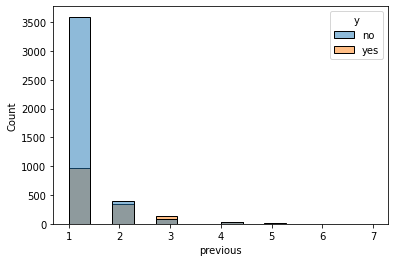

In [41]:
sns.histplot(data=df2[df2["previous"] >= 1], hue="y", x="previous")